In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [31]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [32]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [33]:
from citipy import citipy

In [34]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [35]:
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [36]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san fernando
Processing Record 2 of Set 1 | ixtapa
Processing Record 3 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | shingu
Processing Record 6 of Set 1 | abu kamal
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | aldan
Processing Record 11 of Set 1 | cascais
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | alamogordo
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | kikwit
Processing Record 16 of Set 1 | nizhniy kuranakh
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | fare
Processing Reco

Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | florida
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | ankazoabo
Processing Record 47 of Set 4 | gao
Processing Record 48 of Set 4 | dingle
Processing Record 49 of Set 4 | hilo
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | asau
Processing Record 2 of Set 5 | mecca
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | ilebo
Processing Record 5 of Set 5 | fort nelson
Processing Record 6 of Set 5 | newport
Processing Record 7 of Set 5 | mujiayingzi
Processing Record 8 of Set 5 | beringovskiy
Processing Record 9 of Set 5 | torbay
Processing Record 10 of Set 5 | hamilton
Processing Record 11 of Set 5 | gat
Processing Record 12 of Set 5 | riohacha
Processing Record 13 of Set 5 | virginia beach
Processing Record 14 of Set 5 | minab
Processing Record 15 of Set 5 | ukiah
Processing Record 16 of Set 5 | la libertad
Processing Record 17 of Set 5 | barent

Processing Record 29 of Set 8 | kibala
Processing Record 30 of Set 8 | abu samrah
Processing Record 31 of Set 8 | sitka
Processing Record 32 of Set 8 | ituni
City not found. Skipping...
Processing Record 33 of Set 8 | burgos
Processing Record 34 of Set 8 | carutapera
Processing Record 35 of Set 8 | hukuntsi
Processing Record 36 of Set 8 | scarborough
Processing Record 37 of Set 8 | makinsk
Processing Record 38 of Set 8 | kudat
Processing Record 39 of Set 8 | broome
Processing Record 40 of Set 8 | daru
Processing Record 41 of Set 8 | ardakan
Processing Record 42 of Set 8 | naze
Processing Record 43 of Set 8 | kiunga
Processing Record 44 of Set 8 | lubao
Processing Record 45 of Set 8 | juneau
Processing Record 46 of Set 8 | kyzyl-suu
Processing Record 47 of Set 8 | karasjok
Processing Record 48 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 49 of Set 8 | clyde river
Processing Record 50 of Set 8 | carauari
Processing Record 1 of Set 9 | salalah
Processing Record 2 of Se

Processing Record 16 of Set 12 | apiai
Processing Record 17 of Set 12 | alausi
Processing Record 18 of Set 12 | tual
Processing Record 19 of Set 12 | soyo
Processing Record 20 of Set 12 | kindersley
Processing Record 21 of Set 12 | maghama
City not found. Skipping...
Processing Record 22 of Set 12 | kilmez
City not found. Skipping...
Processing Record 23 of Set 12 | atambua
Processing Record 24 of Set 12 | alexandria
Processing Record 25 of Set 12 | balkanabat
Processing Record 26 of Set 12 | sistranda
Processing Record 27 of Set 12 | jaciara
Processing Record 28 of Set 12 | bonthe
Processing Record 29 of Set 12 | yako
Processing Record 30 of Set 12 | dali
Processing Record 31 of Set 12 | vallenar
Processing Record 32 of Set 12 | juba
Processing Record 33 of Set 12 | zunyi
Processing Record 34 of Set 12 | aksarka
Processing Record 35 of Set 12 | cozumel
Processing Record 36 of Set 12 | half moon bay
Processing Record 37 of Set 12 | amuntai
Processing Record 38 of Set 12 | haines juncti

In [49]:
len(city_data)


581

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Fernando,15.0286,120.6898,81.14,68,45,10.27,PH,2021-11-01 00:30:55
1,Ixtapa,20.7000,-105.2000,75.60,90,3,0.83,MX,2021-11-01 00:30:55
2,Aklavik,68.2191,-135.0107,34.52,87,100,9.80,CA,2021-11-01 00:30:01
3,Shingu,33.7333,135.9833,67.19,64,47,3.91,JP,2021-11-01 00:30:57
4,Abu Kamal,34.4506,40.9171,70.09,58,100,8.12,SY,2021-11-01 00:30:57
5,Pevek,69.7008,170.3133,1.26,94,100,6.22,RU,2021-11-01 00:25:48
6,Ribeira Grande,38.5167,-28.7000,71.20,88,100,7.38,PT,2021-11-01 00:30:58
7,Butaritari,3.0707,172.7902,81.81,76,1,11.54,KI,2021-11-01 00:30:58
8,Aldan,58.6031,125.3894,23.68,87,94,4.74,RU,2021-11-01 00:30:59
9,Cascais,38.6979,-9.4215,71.62,85,96,5.99,PT,2021-11-01 00:30:59


In [51]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Fernando,PH,2021-11-01 00:30:55,15.0286,120.6898,81.14,68,45,10.27
1,Ixtapa,MX,2021-11-01 00:30:55,20.7000,-105.2000,75.60,90,3,0.83
2,Aklavik,CA,2021-11-01 00:30:01,68.2191,-135.0107,34.52,87,100,9.80
3,Shingu,JP,2021-11-01 00:30:57,33.7333,135.9833,67.19,64,47,3.91
4,Abu Kamal,SY,2021-11-01 00:30:57,34.4506,40.9171,70.09,58,100,8.12
5,Pevek,RU,2021-11-01 00:25:48,69.7008,170.3133,1.26,94,100,6.22
6,Ribeira Grande,PT,2021-11-01 00:30:58,38.5167,-28.7000,71.20,88,100,7.38
7,Butaritari,KI,2021-11-01 00:30:58,3.0707,172.7902,81.81,76,1,11.54
8,Aldan,RU,2021-11-01 00:30:59,58.6031,125.3894,23.68,87,94,4.74
9,Cascais,PT,2021-11-01 00:30:59,38.6979,-9.4215,71.62,85,96,5.99


In [52]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [53]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

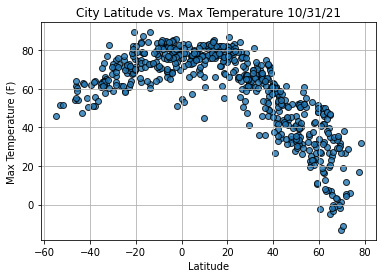

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

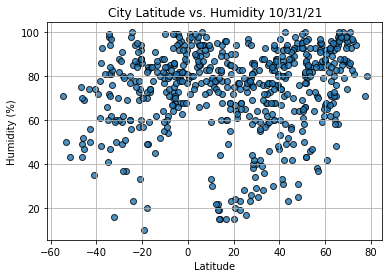

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

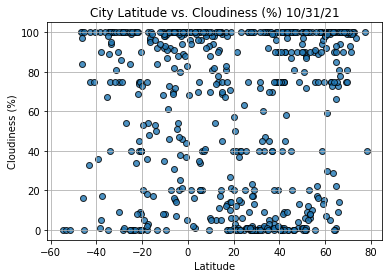

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

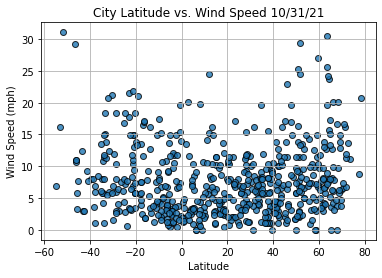

In [57]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [113]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [114]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Fernando,PH,2021-11-01 00:30:55,15.0286,120.6898,81.14,68,45,10.27
1,Ixtapa,MX,2021-11-01 00:30:55,20.7000,-105.2000,75.60,90,3,0.83
2,Aklavik,CA,2021-11-01 00:30:01,68.2191,-135.0107,34.52,87,100,9.80
3,Shingu,JP,2021-11-01 00:30:57,33.7333,135.9833,67.19,64,47,3.91
4,Abu Kamal,SY,2021-11-01 00:30:57,34.4506,40.9171,70.09,58,100,8.12


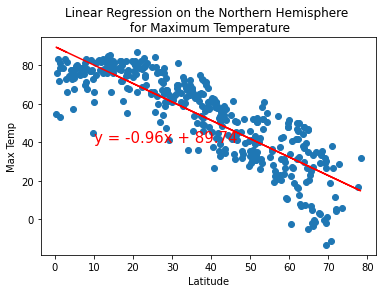

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

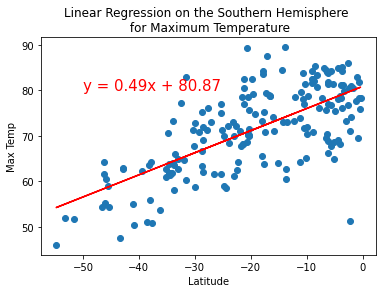

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

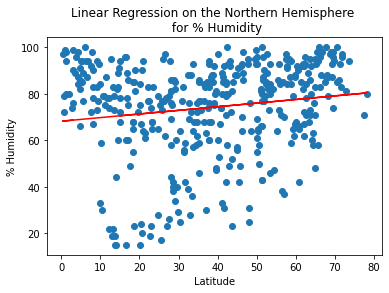

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40,10))

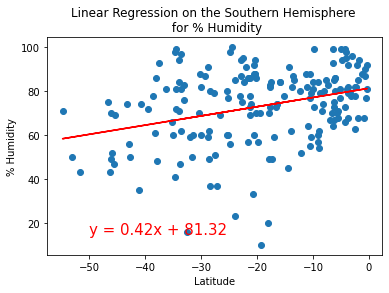

In [118]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

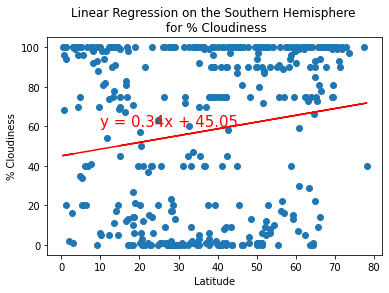

In [119]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,60))

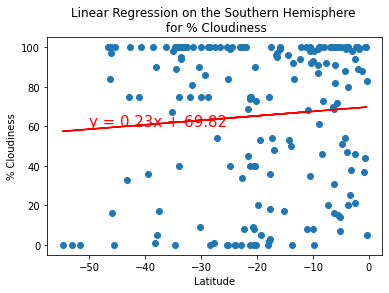

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

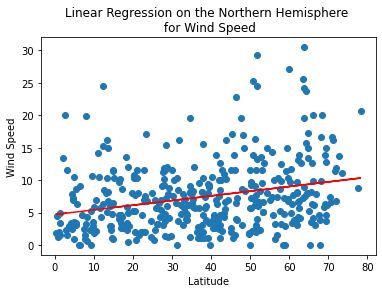

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (40,35))

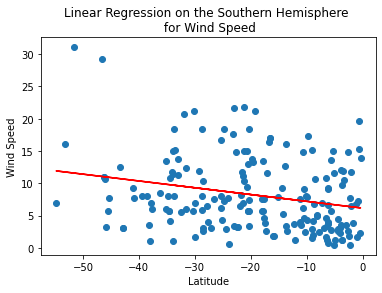

In [123]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,35))